### in this notebook we will see how IOU is calculated

we will create a function that takes in the co-ordinates of two rectangles, one of them being the true label, and return the IOU. the rectangles' co-ordinates must lie in a canvas with the size of 100 pixels by width and height. 

In [17]:
%config use_jedi = False

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [76]:
def iou(box_pred, box_label):
    '''
    function that takes in the coordinates of two rectangles and returns their IOU
    '''
    # find the coordinates of the intersection box
    x1_pred = box_pred[0]
    y1_pred = box_pred[1]
    x2_pred = box_pred[2]
    y2_pred = box_pred[3]
    
    x1_label = box_label[0]
    y1_label = box_label[1]
    x2_label = box_label[2]
    y2_label = box_label[3]
    
    
    # intersection
    int_x1 = np.max([x1_pred, x1_label])
    int_y1 = np.max([y1_pred, y1_label])
    int_x2 = np.min([x2_pred, x2_label])
    int_y2 = np.min([y2_pred, y2_label])
    
    # .clip() is used for cases when the boxes do not intersect
    intersection = (int_x2 - int_x1).clip(0) * (int_y2 - int_y1).clip(0)
    
    # union
    pred_box_area = (x2_pred - x1_pred) * (y2_pred - y1_pred)
    label_box_area = (x2_label - x1_label) * (y2_label - y1_label)
    
    union = pred_box_area + label_box_area - intersection
    
#     print(f'int_x1:{int_x1}')
#     print(f'int_x2:{int_x2}')
#     print(f'int_y1:{int_y1}')
#     print(f'int_y2:{int_y2}')
#     print(f'intersection:{intersection}')
    
    # IOU
    iou = intersection / union
    
    print(f'IOU = {iou}')
    
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    plt.xlim([0,100])
    plt.ylim([0,100])
    # predicted bounding box
    ax.add_patch(Rectangle((x1_pred,y1_pred),
                       x2_pred-x1_pred,y2_pred-y1_pred,
                       fc='none',
                       ec='r',
                       lw=2))
    # true bounding box
    ax.add_patch(Rectangle((x1_label,y1_label),
                       x2_label-x1_label,y2_label-y1_label,
                       fc='none',
                       ec='g',
                       lw=2))
    # intersection
    if intersection != 0:
        ax.add_patch(Rectangle((int_x1,int_y1),
                           int_x2-int_x1,int_y2-int_y1,
                           fc='#a9d6c5',
                           ec='none',
                           lw=0))
    plt.gca().invert_yaxis() # to set the origin at top left
    plt.show()

### test a few examples 

#### 1. prediction and label have the same co-ordinates. in other words, the prediction is perfect 

IOU = 1.0


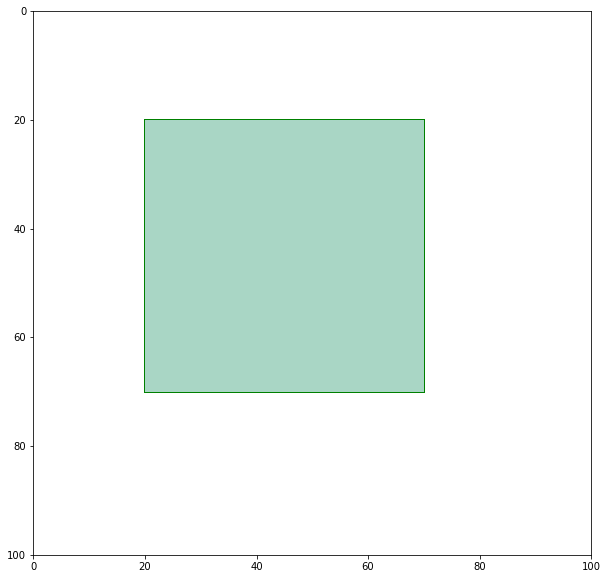

In [83]:
iou(np.array([20,20,70,70]), np.array([20,20,70,70]))

#### 2.  usual case

IOU = 0.4432284541723666


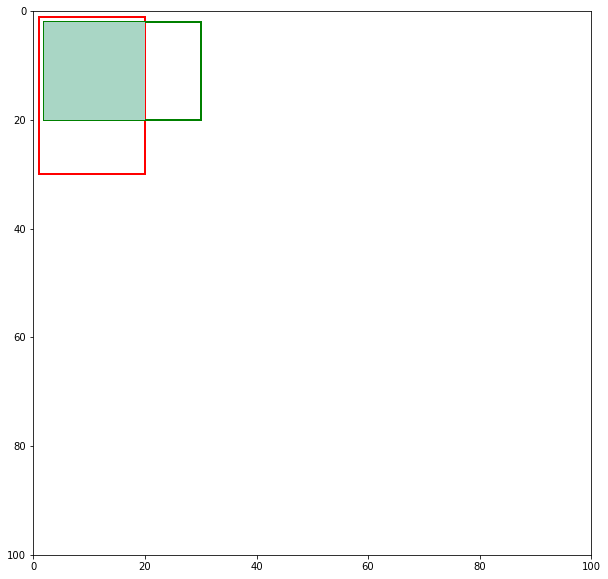

In [78]:
iou(np.array([1,1,20,30]),np.array([2,2,30,20]))

#### 3. when there's no intersection

IOU = 0.0


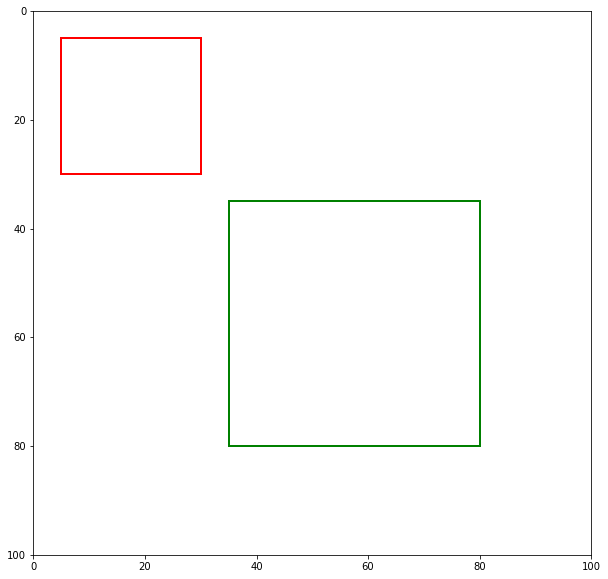

In [79]:
iou(np.array([5,5,30,30]), np.array([35,35,80,80]))

#### 4. reverse of the above example 

IOU = 0.0


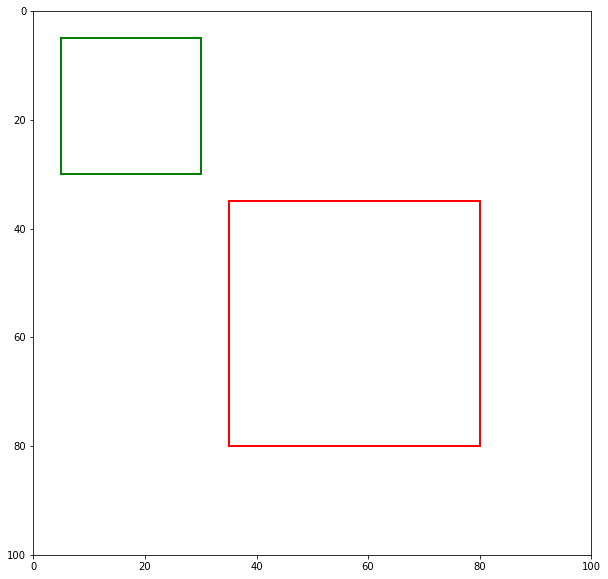

In [81]:
iou(np.array([35,35,80,80]), np.array([5,5,30,30]))

#### Conclusion 

The iou function was successfully created to find the intersection over union

#### appendix

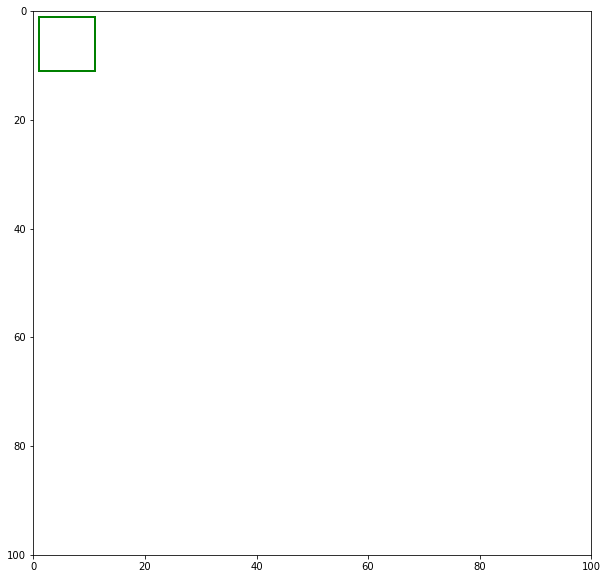

In [24]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.xlim([0,100])
plt.ylim([0,100])
plt.gca().invert_yaxis() # to set the origin at top left
samp_x = [1,2]
samp_y = [1,2]
ax.add_patch(Rectangle((1,1),
                       10,10,
                       fc='none',
                       ec='g',
                       lw=2))

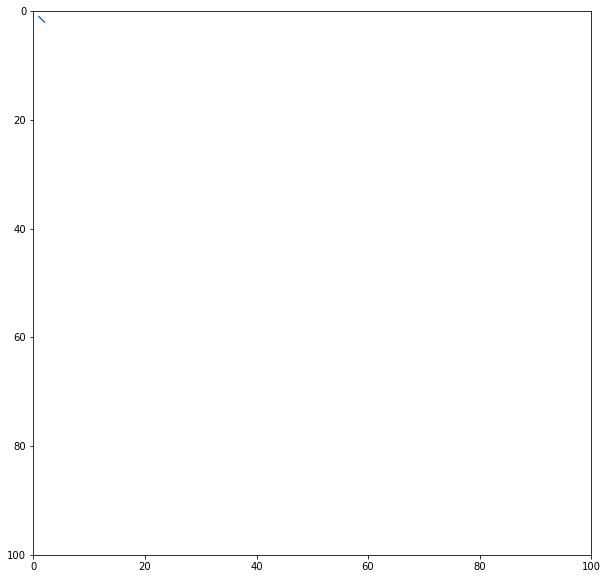

In [16]:
plt.figure(figsize=(10,10))
plt.xlim([0,100])
plt.ylim([0,100])
plt.gca().invert_yaxis() # to set the origin at top left
samp_x = [1,2]
samp_y = [1,2]
plt.plot(samp_x, samp_y)


In [7]:
from platform import python_version
python_version()

'3.10.4'